In [ ]:
import pandas as pd
import sys

In [ ]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [ ]:
from huggingface_hub import login

login(token)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_preprocessed.csv")

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test = x_test["text"].reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 352041
Number of data to validate: 44005
Number of labels to train: 352041
Number of labels to validate: 44005


In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.1 MB/s eta 0:00:00


In [ ]:
pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 29.8 MB/s eta 0:00:00


In [ ]:
import torch
from datasets import Dataset

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load model directly
from transformers import BertForSequenceClassification, AutoTokenizer ,Trainer, TrainingArguments, EarlyStoppingCallback
camelbert = BertForSequenceClassification.from_pretrained("CAMeL-Lab/bert-base-arabic-camelbert-da", num_labels=18)

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at CAMeL-Lab/bert-base-arabic-camelbert-da and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
camelbert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("CAMeL-Lab/bert-base-arabic-camelbert-da", trust_remote_code=True)

sentences = ["مرحبا نحن عمر و علي و هذا مشروع التخرج الخاص بنا"]

token_ids = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt", return_token_type_ids=False)
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['[CLS]', 'مرحبا', 'نحن', 'عمر', 'و', 'علي', 'و', 'هذا', 'مشروع', 'التخرج', 'الخاص', 'بنا', '[SEP]']


In [ ]:
def tokenization(text):
  tokens = tokenizer(text, add_special_tokens=True, padding="max_length", max_length=64, truncation=True, return_tensors="np")

  print(tokens["input_ids"][:2])
  return tokens

In [ ]:
x_train_tokenized = tokenization(x_train_text.to_list())
x_val_tokenized = tokenization(x_val_text.to_list())
x_test_tokenized = tokenization(x_test.to_list())

[[    2  3144 24536  1013  2085  2055  4394  6536  7249  1028  2689  2551
  16450  1911 20553  4431  7249  2689  3432  4050  3573 16361  4153  8344
   3330     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  3144 24536  1013  3144 24536  1013  4558  2287  3572  2325  1912
  17718  1949  1012  3740  3190  5841  3279 13117  7101   378 12378  2556
  14447  5707 13543  4933  2318 15498 15364 10008  4632  1006  3165 18759
   2443  2391  2177 12378  2556    23  3752  3019  3121  1005  1973  2694
   2134  2559  2088  3257  1015  1958  2746  1013  2564  3415  1013  2312
   4956  2357 14234     3]]
[[    2  3144 24536  1013  1972  2821  2062  1007  1915  2194  4278  6899
  20879     3     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0  

In [ ]:
train_labels = y_train.to_numpy()
val_labels = y_val.to_numpy()
test_labels = y_test.to_numpy()

In [ ]:
# Convert tokenized data into a Dataset object
train_dataset = Dataset.from_dict({**x_train_tokenized, "labels": train_labels})
val_dataset = Dataset.from_dict({**x_val_tokenized, "labels": val_labels})
test_dataset = Dataset.from_dict({**x_test_tokenized, "labels": y_test})

In [ ]:
print(train_dataset[0].keys())
print(val_dataset[0].keys())
print(test_dataset[0].keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

In [ ]:
from peft import get_peft_model, LoraConfig

lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["query_proj", "key_proj"]
)

quantized_qwen = get_peft_model(camelbert, lora_config)

In [ ]:
training_args = TrainingArguments(
    output_dir="./camelbert base",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    logging_strategy="steps",
    logging_steps=500,  # Log loss every 500 steps
    report_to="none",  # Prevents `wandb` or other loggers
    gradient_accumulation_steps=2,
    warmup_ratio=0.1,  # Warmup for stable early training
    max_grad_norm=1.0,  # Prevents exploding gradients
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=camelbert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.520800,1.433635,0.546574,0.538923
2,1.268200,1.315451,0.583888,0.575440
3,1.086800,1.286598,0.602613,0.598635
4,0.843000,1.316451,0.610272,0.608472


TrainOutput(global_step=13750, training_loss=1.1992482488458807, metrics={'train_runtime': 4948.1508, 'train_samples_per_second': 355.73, 'train_steps_per_second': 2.779, 'total_flos': 5.788130073944371e+16, 'train_loss': 1.1992482488458807, 'epoch': 4.998363933830213})

In [ ]:
trainer.save_model("camlebert_base")

In [ ]:
trainer.evaluate()

{'eval_loss': 1.286597728729248,
 'eval_accuracy': 0.6026133393932508,
 'eval_f1_score': 0.5986345228566015,
 'eval_runtime': 35.5233,
 'eval_samples_per_second': 1238.765,
 'eval_steps_per_second': 9.684,
 'epoch': 4.998363933830213}

In [ ]:
preds_output = trainer.predict(test_dataset)

In [ ]:
logits = np.argmax(preds_output.predictions, axis=1)

**Wrong Labels ❌**

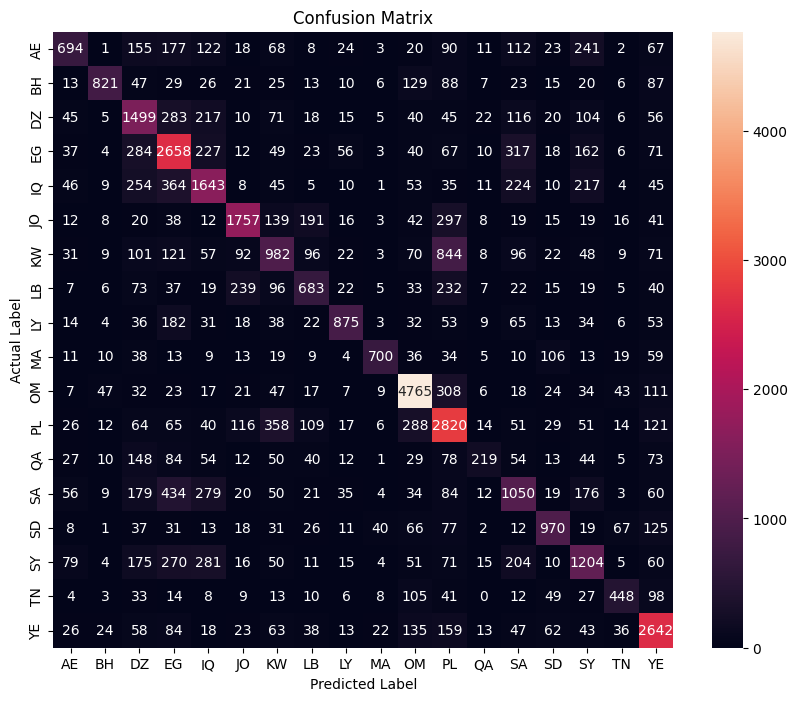

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ["AE", "BH", "DZ", "EG", "IQ", "JO", "KW", "LB", "LY", "MA", "OM", "PL", "QA", "SA", "SD", "SY", "TN", "YE"]
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          AE     0.6072    0.3780    0.4659      1836
          BH     0.8318    0.5924    0.6920      1386
          DZ     0.4637    0.5817    0.5160      2577
          EG     0.5417    0.6573    0.5939      4044
          IQ     0.5347    0.5506    0.5425      2984
          JO     0.7251    0.6623    0.6923      2653
          KW     0.4476    0.3661    0.4028      2682
          LB     0.5097    0.4378    0.4710      1560
          LY     0.7479    0.5880    0.6584      1488
          MA     0.8475    0.6318    0.7239      1108
          OM     0.7984    0.8607    0.8284      5536
          PL     0.5200    0.6713    0.5860      4201
          QA     0.5778    0.2298    0.3288       953
          SA     0.4282    0.4158    0.4219      2525
          SD     0.6769    0.6242    0.6495      1554
          SY     0.4865    0.4768    0.4816      2525
          TN     0.6400    0.5045    0.5642       888
 

**Correct Labels ✅**

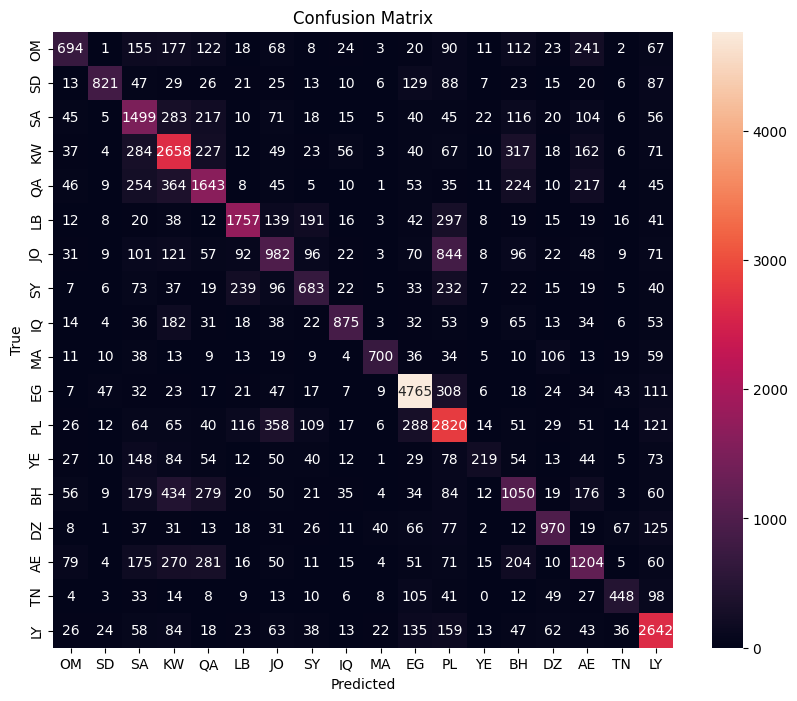

In [1]:
import numpy as np

# Confusion matrix (18x18) with your specified label order
confusion_matrix = np.array([
    [694, 1, 155, 177, 122, 18, 68, 8, 24, 3, 20, 90, 11, 112, 23, 241, 2, 67],
    [13, 821, 47, 29, 26, 21, 25, 13, 10, 6, 129, 88, 7, 23, 15, 20, 6, 87],
    [45, 5, 1499, 283, 217, 10, 71, 18, 15, 5, 40, 45, 22, 116, 20, 104, 6, 56],
    [37, 4, 284, 2658, 227, 12, 49, 23, 56, 3, 40, 67, 10, 317, 18, 162, 6, 71],
    [46, 9, 254, 364, 1643, 8, 45, 5, 10, 1, 53, 35, 11, 224, 10, 217, 4, 45],
    [12, 8, 20, 38, 12, 1757, 139, 191, 16, 3, 42, 297, 8, 19, 15, 19, 16, 41],
    [31, 9, 101, 121, 57, 92, 982, 96, 22, 3, 70, 844, 8, 96, 22, 48, 9, 71],
    [7, 6, 73, 37, 19, 239, 96, 683, 22, 5, 33, 232, 7, 22, 15, 19, 5, 40],
    [14, 4, 36, 182, 31, 18, 38, 22, 875, 3, 32, 53, 9, 65, 13, 34, 6, 53],
    [11, 10, 38, 13, 9, 13, 19, 9, 4, 700, 36, 34, 5, 10, 106, 13, 19, 59],
    [7, 47, 32, 23, 17, 21, 47, 17, 7, 9, 4765, 308, 6, 18, 24, 34, 43, 111],
    [26, 12, 64, 65, 40, 116, 358, 109, 17, 6, 288, 2820, 14, 51, 29, 51, 14, 121],
    [27, 10, 148, 84, 54, 12, 50, 40, 12, 1, 29, 78, 219, 54, 13, 44, 5, 73],
    [56, 9, 179, 434, 279, 20, 50, 21, 35, 4, 34, 84, 12, 1050, 19, 176, 3, 60],
    [8, 1, 37, 31, 13, 18, 31, 26, 11, 40, 66, 77, 2, 12, 970, 19, 67, 125],
    [79, 4, 175, 270, 281, 16, 50, 11, 15, 4, 51, 71, 15, 204, 10, 1204, 5, 60],
    [4, 3, 33, 14, 8, 9, 13, 10, 6, 8, 105, 41, 0, 12, 49, 27, 448, 98],
    [26, 24, 58, 84, 18, 23, 63, 38, 13, 22, 135, 159, 13, 47, 62, 43, 36, 2642]
])

# Label list for reference
labels = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()